In [18]:
import pandas as pd

# Load the Titanic dataset
file_path = 'C:/Users/DELL/anaconda3/TitanicDataset.csv'
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Handle missing values in 'Age' column using median
imputer_age = SimpleImputer(strategy='median')
titanic_data['Age'] = imputer_age.fit_transform(titanic_data[['Age']])

# Handle missing values in 'Embarked' column using the most frequent value
imputer_embarked = SimpleImputer(strategy='most_frequent')
titanic_data['Embarked'] = imputer_embarked.fit_transform(titanic_data[['Embarked']]).ravel()

# Drop the 'Cabin' column due to a large number of missing values
titanic_data.drop(columns=['Cabin'], inplace=True)

# Encode 'Sex' column to numerical values
label_encoder_sex = LabelEncoder()
titanic_data['Sex'] = label_encoder_sex.fit_transform(titanic_data['Sex'])

# Encode 'Embarked' column to numerical values
label_encoder_embarked = LabelEncoder()
titanic_data['Embarked'] = label_encoder_embarked.fit_transform(titanic_data['Embarked'])

# Drop unnecessary columns
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Display the first few rows after preprocessing
titanic_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


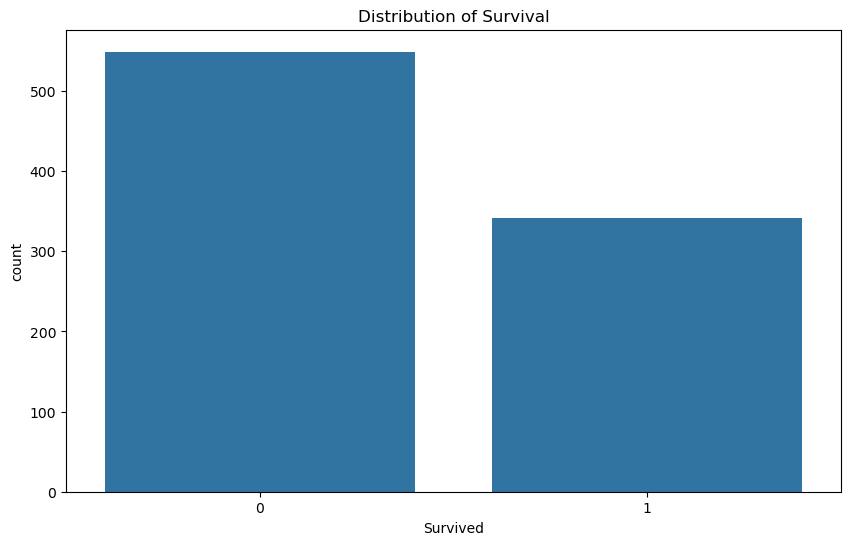

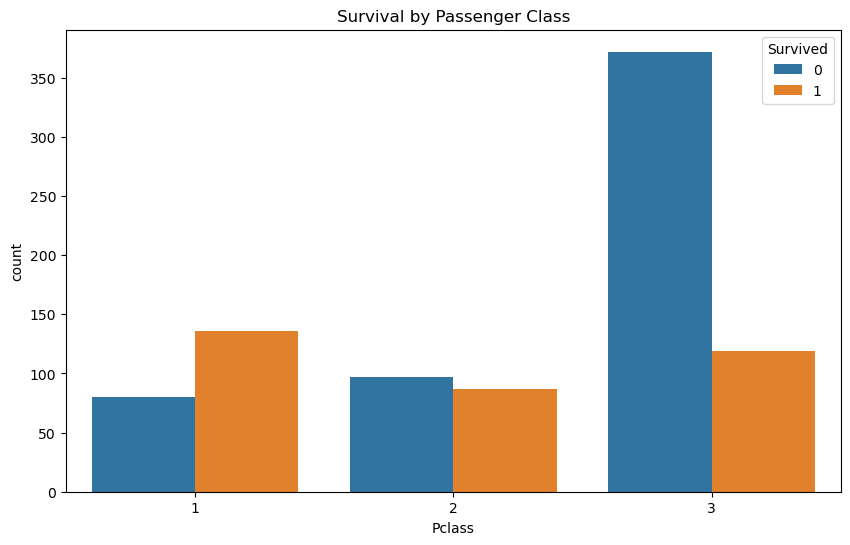

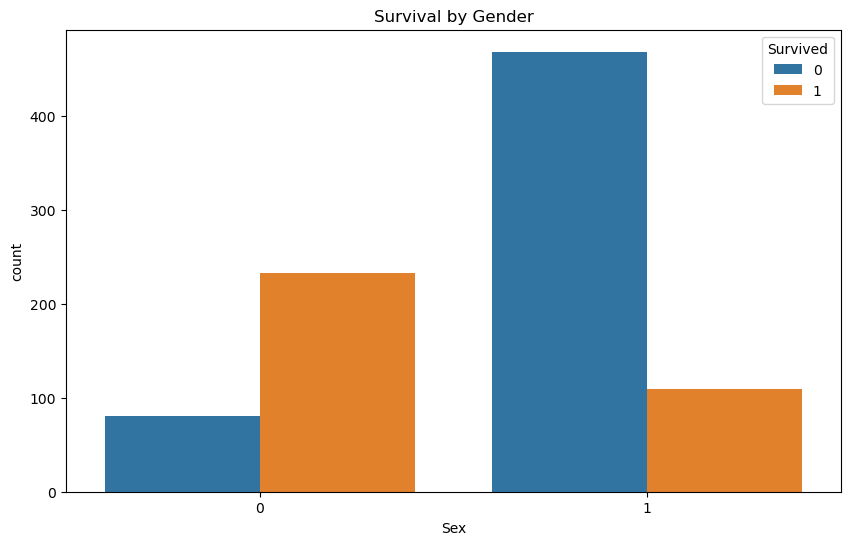

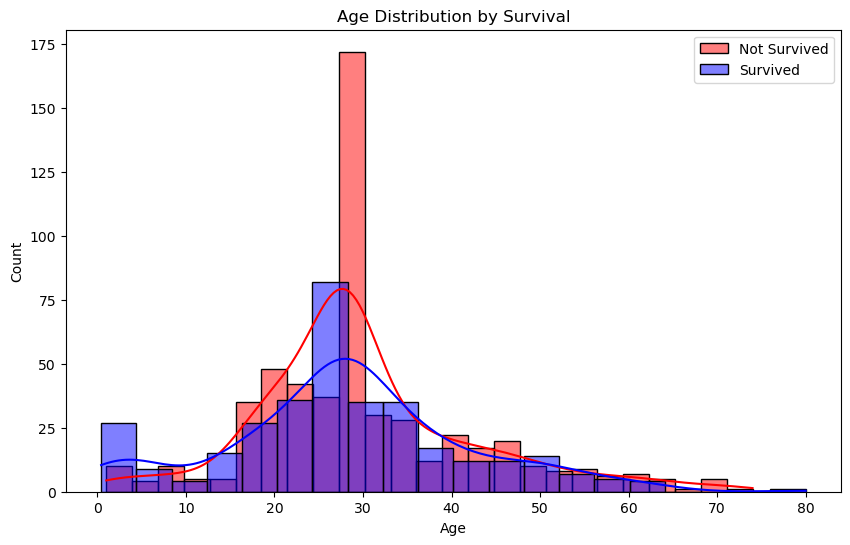

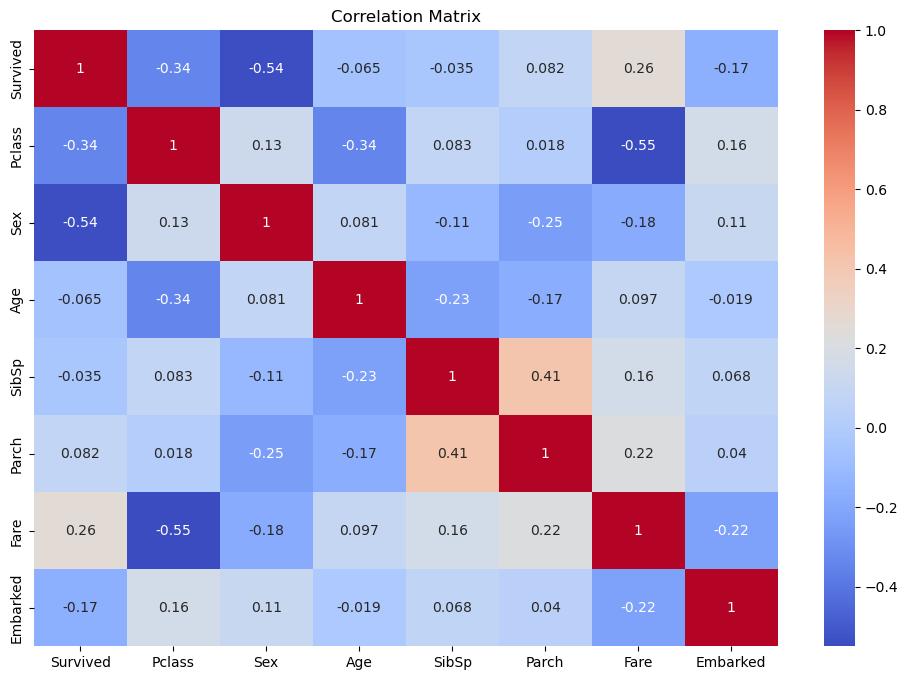

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Survival
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Distribution of Survival')
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival by Passenger Class')
plt.show()

# Survival by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival by Gender')
plt.show()

# Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Age'], kde=True, color='blue', label='Survived')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

# Split data into features and target variable
X = titanic_data.drop(columns='Survived')
y = titanic_data['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[92 13]
 [19 55]]
Accuracy Score: 0.8212290502793296


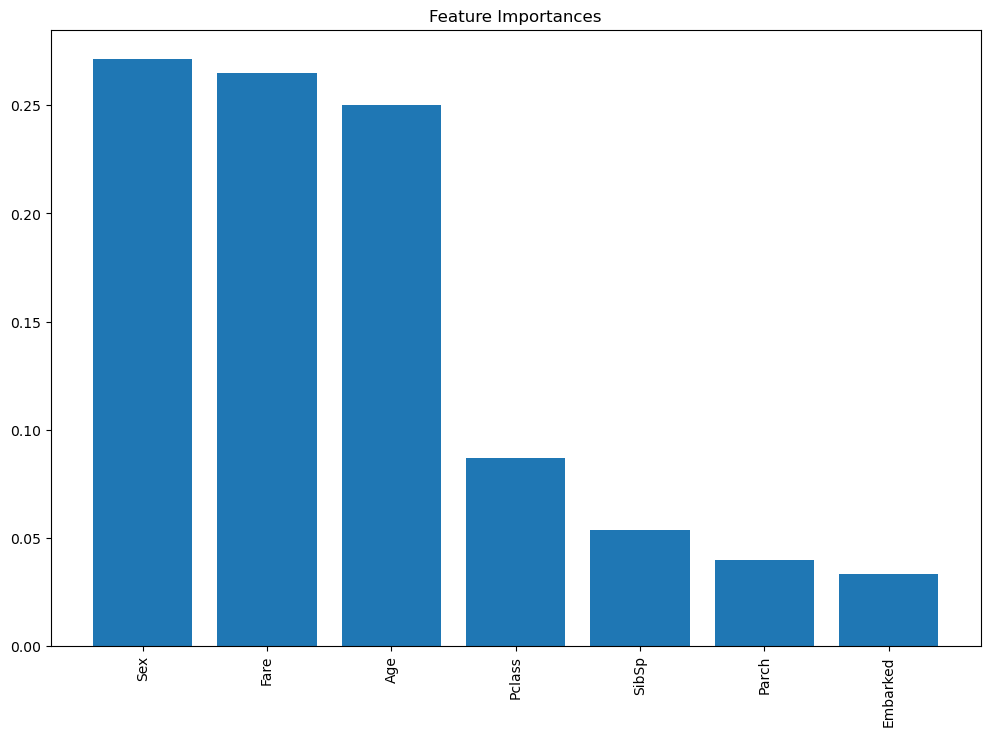

In [25]:
import numpy as np

# Plot feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


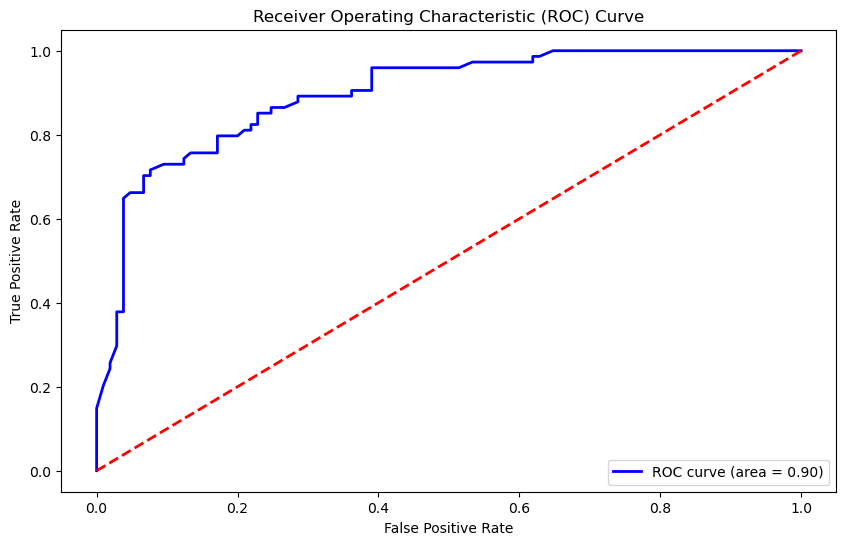

In [26]:
# Plot ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
